# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
df = pd.read_csv('Churned_churned.csv')

In [3]:
df = df.drop(['Customer_ID', 'Value_Deal', 'Number_of_Referrals', 'Churn_Category', 'Churn_Reason'], axis = 1)

In [4]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned' : 1})

In [5]:
df.isnull().sum()

Gender                         0
Age                            0
Married                        0
State                          0
Tenure_in_Months               0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
dtype: int64

In [6]:
X = df.iloc[:,:-1]
X

,Gender,Age,Married,State,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,Male,43,Yes,Jammu & Kashmir,10,Yes,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Credit Card,75.349998,3161.399902,0.0,0,845.380005,4006.780029
1,Male,34,Yes,Haryana,12,Yes,No,No,None,No,...,No,Two Year,No,Credit Card,20.900000,454.000000,0.0,0,434.929993,888.929993
2,Male,29,No,Jammu & Kashmir,5,Yes,No,Yes,Cable,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,70.699997,141.449997,0.0,0,19.520000,160.970001
3,Male,50,No,Haryana,31,Yes,No,Yes,Fiber Optic,No,...,No,Month-to-Month,No,Bank Withdrawal,77.849998,299.200012,0.0,10,171.199997,480.399994
4,Female,74,Yes,Madhya Pradesh,5,Yes,No,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Mailed Check,70.449997,70.449997,0.0,0,15.280000,85.730003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,Female,56,No,Madhya Pradesh,13,Yes,Yes,Yes,Fiber Optic,Yes,...,Yes,Two Year,Yes,Bank Withdrawal,114.000000,8093.149902,0.0,0,2337.840088,10430.990230
6003,Male,30,No,Rajasthan,6,Yes,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,75.599998,1395.050049,0.0,0,273.239990,1668.290039
6004,Male,24,Yes,Uttar Pradesh,4,Yes,No,Yes,Fiber Optic,No,...,Yes,One Year,Yes,Credit Card,102.449997,6654.100098,0.0,0,2591.360107,9245.459961
6005,Female,34,Yes,Assam,21,Yes,Yes,Yes,Fiber Optic,No,...,Yes,Month-to-Month,No,Credit Card,80.000000,4242.350098,0.0,0,286.619995,4528.970215


In [7]:
# Select categorical columns
def encoding(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    for column in categorical_columns:
        encoder = OneHotEncoder(sparse=False)
        dataframe[column] = encoder.fit_transform(dataframe[column].values.reshape(-1, 1))

In [8]:
encoding(X)

In [9]:
X

,Gender,Age,Married,State,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0.0,43,0.0,0.0,10,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,75.349998,3161.399902,0.0,0,845.380005,4006.780029
1,0.0,34,0.0,0.0,12,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,20.900000,454.000000,0.0,0,434.929993,888.929993
2,0.0,29,1.0,0.0,5,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,70.699997,141.449997,0.0,0,19.520000,160.970001
3,0.0,50,1.0,0.0,31,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,77.849998,299.200012,0.0,10,171.199997,480.399994
4,1.0,74,0.0,0.0,5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,70.449997,70.449997,0.0,0,15.280000,85.730003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,1.0,56,1.0,0.0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,114.000000,8093.149902,0.0,0,2337.840088,10430.990230
6003,0.0,30,1.0,0.0,6,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,75.599998,1395.050049,0.0,0,273.239990,1668.290039
6004,0.0,24,0.0,0.0,4,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,102.449997,6654.100098,0.0,0,2591.360107,9245.459961
6005,1.0,34,0.0,0.0,21,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,80.000000,4242.350098,0.0,0,286.619995,4528.970215


In [10]:
X.shape

(6007, 26)

In [11]:
y = df.iloc[:,-1]
y

0       0
1       0
2       1
3       1
4       1
       ..
6002    0
6003    0
6004    0
6005    1
6006    0
Name: Customer_Status, Length: 6007, dtype: int64

In [12]:
y.shape

(6007,)

# Model Training

In [13]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [16]:
y_pred = rf_model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.84


In [18]:
print(confusion_matrix(y_test, y_pred))

[[803  59]
 [128 212]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       862
           1       0.78      0.62      0.69       340

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.79      1202
weighted avg       0.84      0.84      0.84      1202



# Feature Scaling

In [20]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


In [21]:
indices

array([21, 25, 17, 20, 24,  1,  4,  9,  7, 12, 19, 18, 23,  2,  6,  0, 11,
       10, 22, 16, 15, 13, 14,  8,  3,  5], dtype=int64)

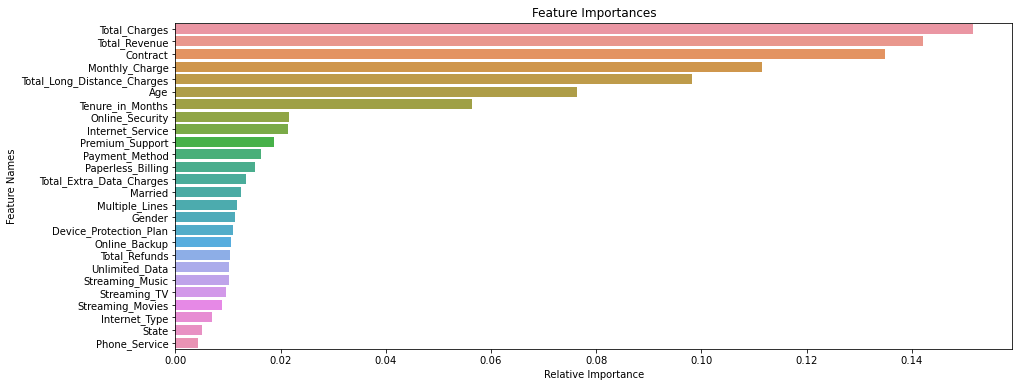

In [22]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [23]:
import pickle
import os
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

# Predicting New data 

In [25]:
df_new = pd.read_csv ('Churned_joined.csv')

In [26]:
# Retain the original DataFrame to preserve unencoded columns
original_data = df_new.copy()

# Retain the Customer_ID column
customer_ids = df_new['Customer_ID']


In [27]:
df_new = df_new.drop(['Customer_ID', 'Value_Deal', 'Customer_Status', 'Number_of_Referrals', 'Churn_Category', 'Churn_Reason'], axis = 1)

In [28]:
df_new.shape

(411, 26)

In [29]:
encoding(df_new)

In [30]:
df_new.shape

(411, 26)

In [31]:
new_data_categorical_columns = df_new.select_dtypes(include=['object', 'category']).columns

In [32]:
new_data_categorical_columns

Index([], dtype='object')

In [33]:
load_model = pickle.load(open('rf_model.pkl', 'rb'))

In [34]:
predictions = load_model.predict(df_new)

In [35]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
original_data['Customer_Status_Predicted'] = predictions

In [37]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv("Predictions.csv", index=False)
